# Problem 7
In this problem we apply GMM classification on a set of two football teams: ManchesterUnited and Chelsea.

In [1]:
import pandas as pd
from PIL import Image, ImageColor
import os
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

data_path = './HW3_Q7_Dataset/Q6_Dataset/Images/'

# Importing Data
Here we read image files with PIL Image.open function and convert each image to numpy array. Then we optain the mean Red and mean Blue color of the the pixels of each of these arrays. We will use mean Red and mean Blue as the two features of each sample image.

Also we find the real class of each image based on the first letter of the filename of that image. If it is 'c' the class is 1 and 0 otherwise.

In [2]:
samples = []
file_names = os.listdir(data_path)

for f in file_names:
    img = Image.open(os.path.join(data_path, f))
    img = np.array(img)    
    samples.append([np.mean(img[:, :, 0]), np.mean(img[:, :, 2]), int(f[0] == 'c')])
                   
data = pd.DataFrame(samples, columns=['red', 'blue', 'class'])                   

We see that 64 of the samples are of class 1(Chelsea)

In [3]:
data["class"].sum()

64

In [4]:
from matplotlib.patches import Ellipse

def plot_data(ax, X, y_pred, zorder):
    ax.scatter(X['red'], X['blue'], c=y_pred, zorder=2);
    ax.set_title('Distribution of mean R,B of images')
    ax.set_xlabel('red')
    ax.set_ylabel('blue') ##Chelsea

def plot_contour(ax, g_params):
    for xy, covariance, w in g_params:
        
        U, s, Vt = np.linalg.svd(covariance)        
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))    
        width, height = 2 * np.sqrt(s) 
        
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(xy, nsig * width, nsig * height,
                                 angle, alpha= 0.1))
        
def plot_results(X, y_pred, g_params):
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.axis('equal')

    plot_data(ax, X, y_pred, zorder=2)
    plot_contour(ax, g_params)
    
#     w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor

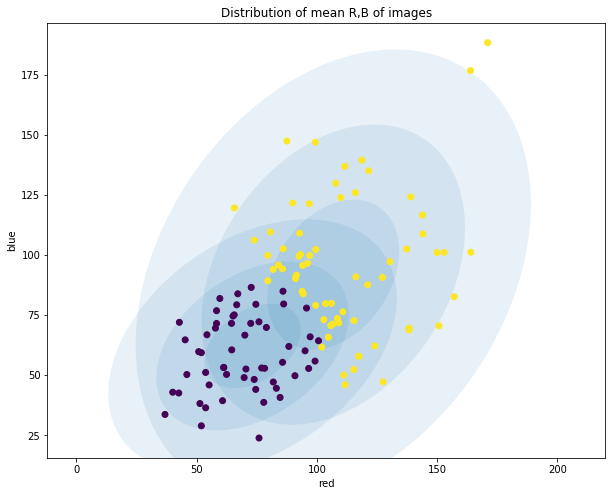

In [7]:
X = data[['red', 'blue']]
y = data['class']
gmm = GMM(n_components=2).fit(X)
y_pred = gmm.predict(X)
g_params = zip(gmm.means_, gmm.covariances_, gmm.weights_)
plot_results(X, y_pred, g_params)

In [91]:
num_components = 30
x = np.arange(1, num_components)
models = list(map(
    lambda x : GMM(x, covariance_type="full")
    .fit(X), x
    ))
bics = [m.bic(X) for m in models]
aics = [m.aic(X) for m in models]

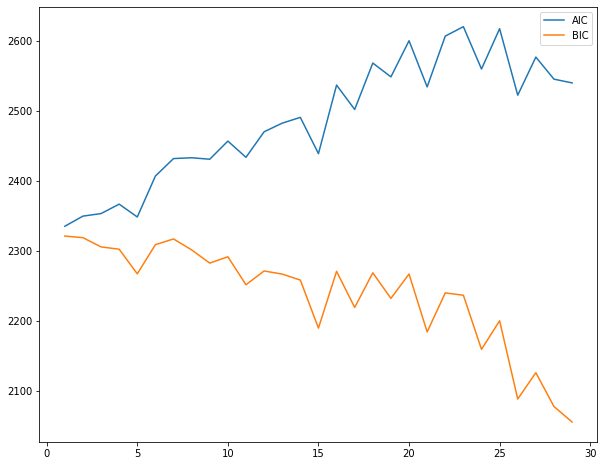

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
# ax.axis('equal')
ax.plot(x, bics, label='AIC')
ax.plot(x, aics, label='BIC')
ax.legend()